In [1]:
from operator import index

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

In [80]:
df = pd.read_csv('points.csv', index_col=None)

In [81]:
df

,frame,track_id,x,y,team
0,1,1,34.598809,47.237344,0
1,1,2,65.345368,47.363980,1
2,1,3,44.957383,58.329746,0
3,1,4,56.908304,54.674491,0
4,1,5,64.835425,54.625422,1
...,...,...,...,...,...
11625,553,32,50.352709,71.123137,0
11626,553,1,54.511415,50.886126,0
11627,553,3,69.820870,67.549281,0
11628,553,18,69.848122,51.113777,1


In [9]:
df_one_player = df[df['track_id'] == 1]

In [37]:
def apply_rolling_mean(df: pd.DataFrame, window=7) -> pd.DataFrame:
    for track_id in df['track_id'].unique():
        df_one_player = df[df['track_id'] == track_id]
        rolling_x = df_one_player['x'].rolling(window=window, center=True).mean()
        rolling_y = df_one_player['y'].rolling(window=window, center=True).mean()
        df.loc[df['track_id'] == track_id, 'x_smooth'] = rolling_x
        df.loc[df['track_id'] == track_id, 'y_smooth'] = rolling_y
    return df

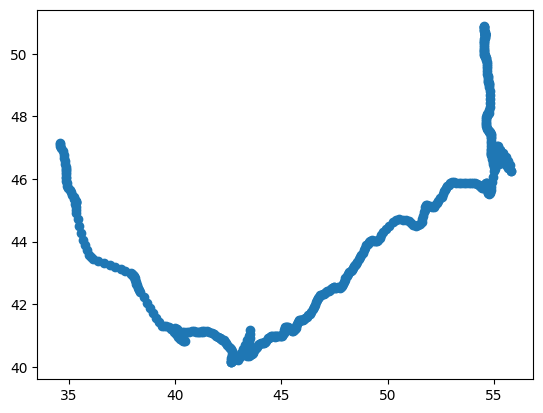

In [31]:
plt.scatter(df_one_player['x_smooth'], df_one_player['y_smooth'])
# plt.xlim(0, 105)
# plt.ylim(0, 68)
plt.show()

In [87]:
from scipy.signal import savgol_filter

points = df_one_player[['x', 'y']].values

# Zastosowanie filtra Savitzky-Golay
x_smooth = savgol_filter(points[:, 0], window_length=7, polyorder=2)
y_smooth = savgol_filter(points[:, 1], window_length=7, polyorder=2)

# Łączenie wyników
smoothed_points = np.column_stack((x_smooth, y_smooth))

In [56]:
smoothed_points

array([[34.49740814, 47.36686439],
       [34.53031514, 47.28831173],
       [34.56322214, 47.20975907],
       ...,
       [54.51653681, 50.89909902],
       [54.51159467, 50.92432692],
       [54.50665252, 50.94955482]])

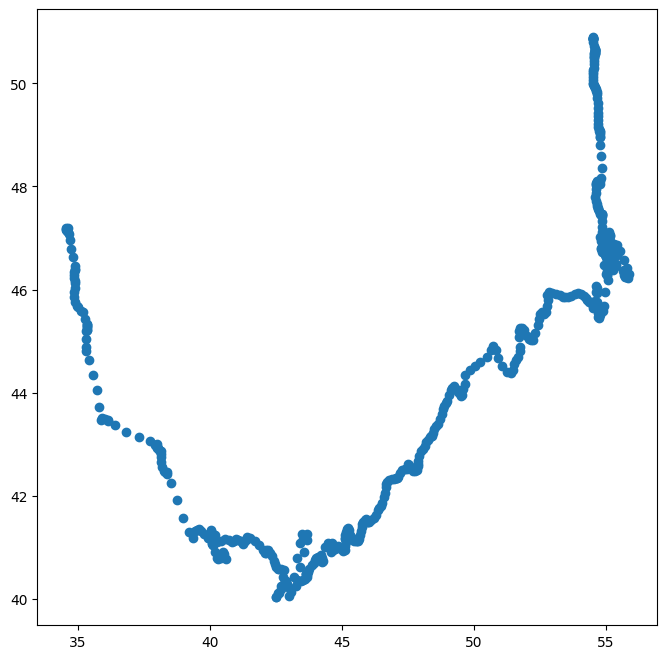

In [88]:
plt.figure(figsize=(8, 8))
plt.scatter(smoothed_points[:, 0], smoothed_points[:, 1])
plt.show()


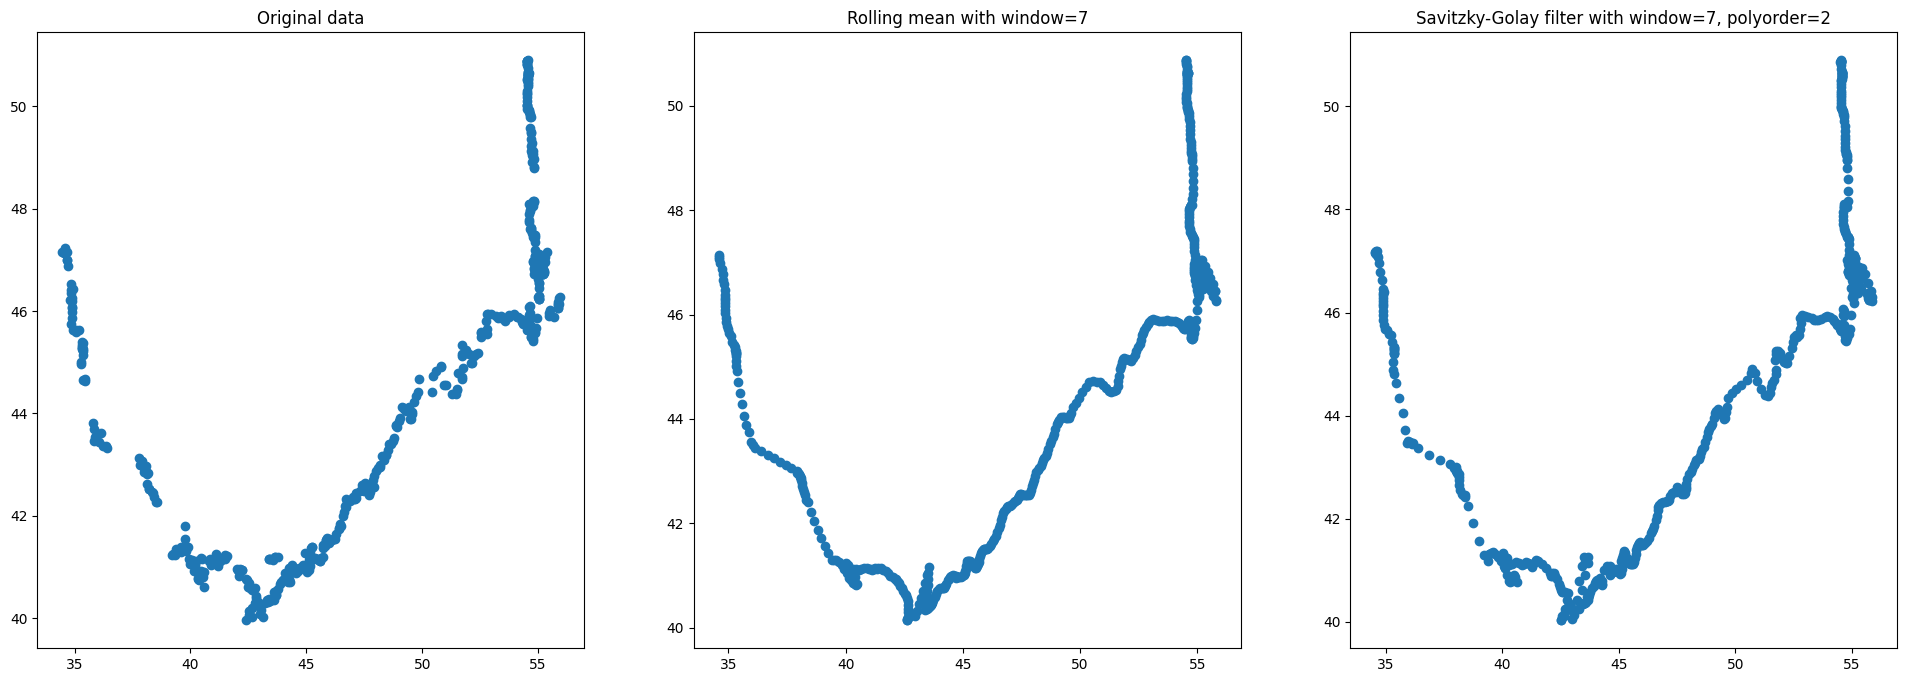

In [89]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.scatter(df_one_player['x'], df_one_player['y'])
plt.title('Original data')
plt.subplot(1, 3, 2)
plt.scatter(df_one_player['x_smooth'], df_one_player['y_smooth'])
plt.title('Rolling mean with window=7')
plt.subplot(1, 3, 3)
plt.scatter(smoothed_points[:, 0], smoothed_points[:, 1])
plt.title('Savitzky-Golay filter with window=7, polyorder=2')
plt.show()

In [82]:
df_with_mean = apply_rolling_mean(df, window=5)
df_with_mean[df_with_mean['x_smooth'].isna()]

,frame,track_id,x,y,team,x_smooth,y_smooth
0,1,1,34.598809,47.237344,0,NaN,NaN
1,1,2,65.345368,47.363980,1,NaN,NaN
2,1,3,44.957383,58.329746,0,NaN,NaN
3,1,4,56.908304,54.674491,0,NaN,NaN
4,1,5,64.835425,54.625422,1,NaN,NaN
...,...,...,...,...,...,...,...
11625,553,32,50.352709,71.123137,0,NaN,NaN
11626,553,1,54.511415,50.886126,0,NaN,NaN
11627,553,3,69.820870,67.549281,0,NaN,NaN
11628,553,18,69.848122,51.113777,1,NaN,NaN


In [83]:
df_with_mean.dropna(subset=['x_smooth'], inplace=True)

In [84]:
df_with_mean['frame']

40         3
41         3
42         3
43         3
44         3
        ... 
11584    551
11585    551
11586    551
11587    551
11588    551
Name: frame, Length: 11501, dtype: int64

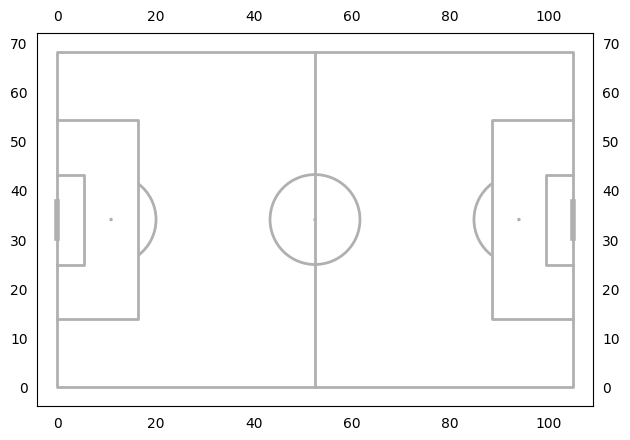

In [85]:
from matplotlib import animation
pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)

def animate(i):
    frame_postions = df_with_mean[df_with_mean['frame'] == i][['x_smooth', 'y_smooth']].values
    fame_teams = df_with_mean[df_with_mean['frame'] == i]['team'].values
    home_positions = frame_postions[fame_teams == np.int32(0)]
    away_positions = frame_postions[fame_teams == np.int32(1)]
    home.set_data(home_positions[:, 0], home_positions[:, 1])
    away.set_data(away_positions[:, 0], away_positions[:, 1])
    return home, away
    
ani = animation.FuncAnimation(fig, animate, frames=df_with_mean['frame'].max(), interval=100, blit=True)
plt.show()

In [86]:
ani.save('animation.mp4', fps=30)

In [2]:
df = pd.read_csv('points.csv', index_col=None)

In [6]:
df[df['frame'] == 1]

,frame,track_id,x,y,team
0,1,1,34.598809,47.237344,0
1,1,2,65.345368,47.363980,1
2,1,3,44.957383,58.329746,0
3,1,4,56.908304,54.674491,0
4,1,5,64.835425,54.625422,1
5,1,6,52.755303,53.091329,1
6,1,7,57.982016,46.245484,0
7,1,8,63.854483,37.227115,1
8,1,9,32.777906,29.049748,0
9,1,10,63.761482,16.624062,1


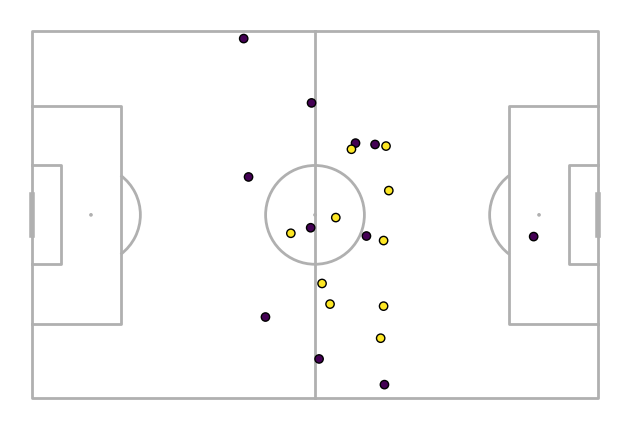

In [2]:
from radar import Radar
import pandas as pd

df = pd.read_csv('points.csv', index_col=None)
radar = Radar(df)
radar.draw_radar(100)